In [149]:
import pandas as pd
import numpy as np

import glob

In [150]:
path = f'../Data'
raw_datafiles = glob.glob(f"{path}/*.csv")

dfs = {file.split('/')[-1].split('.')[0]: pd.read_csv(file) for file in raw_datafiles}

for year in range(2020, 2025):
    dfs[f'Data\\{year}'].set_index('G', inplace=True)

In [151]:
features = {'MP','FG','FGA','3P','3PA','FT','FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc','+/-'}
num_features = len(features)

# Removing seconds for convenience.

def second_remove(s):
    s = str(s)
    return int(s[:2])

for i in range(2020, 2025):

    dfs[f'Data\\{i}'] = dfs[f'Data\\{i}'][list(features)]
    dfs[f'Data\\{i}']['MP'] = dfs[f'Data\\{i}']['MP'].apply(second_remove)
    dfs[f'Data\\{i}'] = dfs[f'Data\\{i}'].apply(pd.to_numeric, errors = 'coerce')

dfs['Data\\2020'].describe()

,FG,DRB,TOV,FT,STL,MP,ORB,FGA,GmSc,PF,BLK,AST,+/-,3PA,3P,FTA,PTS
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,7.739726,7.465753,3.095890,3.369863,1.164384,31.438356,2.273973,14.671233,18.484932,3.041096,0.602740,7.013699,3.493151,3.493151,1.095890,4.123288,19.945205
std,3.131504,3.253554,1.959056,2.637901,1.080300,5.204128,1.565782,5.088262,8.302421,1.252091,0.812057,3.039066,9.744120,2.141672,1.180447,3.201324,8.202118
min,1.000000,1.000000,0.000000,0.000000,0.000000,10.000000,0.000000,1.000000,2.400000,0.000000,0.000000,0.000000,-16.000000,0.000000,0.000000,0.000000,2.000000
25%,5.000000,5.000000,2.000000,1.000000,0.000000,29.000000,1.000000,11.000000,13.400000,2.000000,0.000000,5.000000,-3.000000,2.000000,0.000000,2.000000,14.000000
50%,7.000000,7.000000,3.000000,3.000000,1.000000,32.000000,2.000000,15.000000,17.100000,3.000000,0.000000,7.000000,3.000000,3.000000,1.000000,4.000000,20.000000
75%,10.000000,9.000000,4.000000,5.000000,2.000000,34.000000,3.000000,19.000000,23.000000,4.000000,1.000000,10.000000,10.000000,5.000000,2.000000,6.000000,25.000000
max,16.000000,18.000000,9.000000,11.000000,4.000000,43.000000,7.000000,25.000000,42.900000,6.000000,3.000000,13.000000,25.000000,9.000000,4.000000,16.000000,47.000000


In [152]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler

rfr = RandomForestRegressor(n_estimators=300, max_depth=15, random_state= 37)

In [153]:
scaler = StandardScaler()

for year in range(2021, 2024):

    dfs[f'Data\\{year}']['PtsNextGame'] = (dfs[f'Data\\{year}'])['PTS'].shift(-1) 

    X = dfs[f'Data\\{year}'].drop('PtsNextGame', axis = 1)
    y = dfs[f'Data\\{year}']['PtsNextGame']

    X = X.iloc[:-1]
    y = y.iloc[:-1]

    X = scaler.fit_transform(X)

    y = y.to_numpy()

    X = X.reshape((X.shape[0], X.shape[1]))
    y = y.reshape(y.shape[0],1)

    rfr.fit(X, y)

C:\Users\suhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\suhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\suhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

In [154]:
dfs[f'Data\\2024']['PtsNextGame'] = (dfs[f'Data\\2024'])['PTS'].shift(-1) # Shifting by 1.

X_test = dfs['Data\\2024'].drop('PtsNextGame', axis = 1)
X_test = (X_test.iloc[:-1]) # Removing NaN value formed by shift.
X_test = scaler.fit_transform(X_test)

y_test = dfs['Data\\2024']['PtsNextGame']
y_test = (y_test.iloc[:-1]).to_numpy() # Removing NaN value formed by shift.

predictions = rfr.predict(X_test)

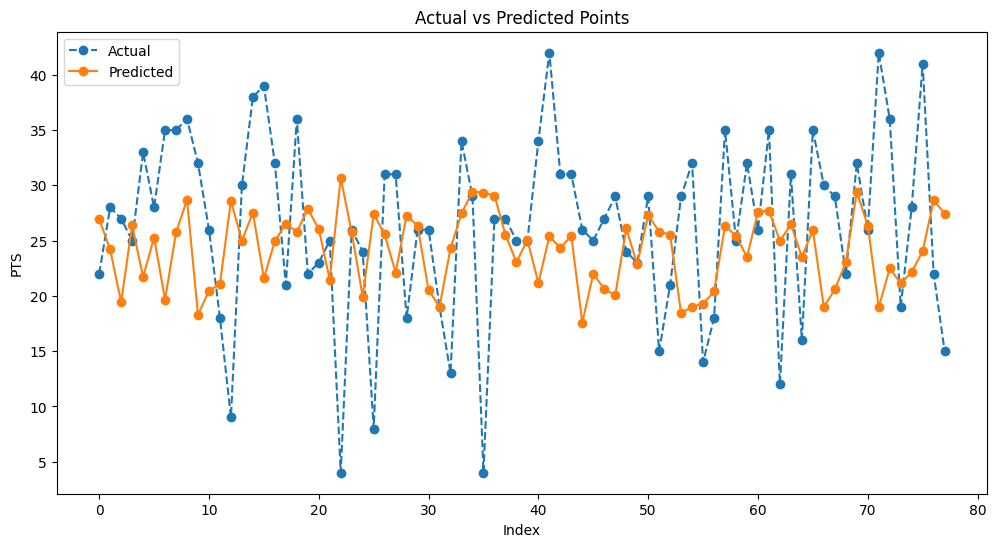

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linestyle='--', marker='o')
plt.plot(predictions, label='Predicted', linestyle='-', marker='o')
plt.xlabel('Index')
plt.ylabel('PTS')
plt.title('Actual vs Predicted Points')
plt.legend()
plt.show()


<Axes: >

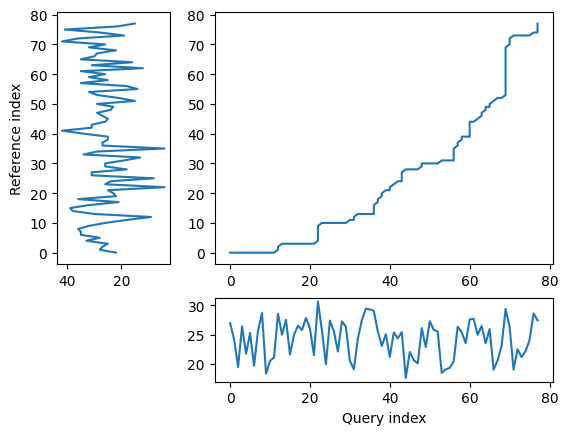

In [156]:
from dtw import *

query = predictions
template = y_test

alignment = dtw(query, template, keep_internals=True)
alignment.plot(type = 'threeway')

In [163]:
from sklearn.metrics import root_mean_squared_log_error, mean_gamma_deviance
print(f"\nRMSLE : {root_mean_squared_log_error(predictions, y_test)}\n\n MGD : {mean_gamma_deviance(predictions, y_test)}\n")


RMSLE : 0.457861682619549

 MGD : 0.38374381132898466

